# Unidad 3: Modelos no supervisados

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Análisis de componentes principales


In [2]:
x = np.array([[0.9, 1],
              [2.4, 2.6],
              [1.2, 1.7],
              [0.5, 0.7],
              [0.3, 0.7],
              [1.8, 1.4],
              [0.5, 0.6],
              [0.3, 0.6],
              [2.5, 2.6],
              [1.3, 1.1]])

y = np.array([x.T[0] - mean(x.T[0]),
              x.T[1] - mean(x.T[1])])
c = np.cov(y)

l, v = np.linalg.eig(c)

print("Los vectores propios son: ", v[0], "y", v[1])
print("Los valores propios son: ", l)

print("Primer componente: ", dot(y.T, v.T[0]))
print("Segundo componente: ", -dot(y.T, v.T[1]))

Los vectores propios son:  [ 0.73251454 -0.68075138] y [ 0.68075138  0.73251454]
Los valores propios son:  [ 1.25057433  0.03398123]
Primer componente:  [-0.40200434  1.78596968  0.29427599 -0.89923557 -1.04573848  0.5295593
 -0.96731071 -1.11381362  1.85922114 -0.04092339]
Segundo componente:  [ 0.03595149 -0.1149447  -0.27258328 -0.0165947  -0.15274498  0.35562192
  0.05665675 -0.07949352 -0.04686956  0.23500059]


Utilizando `sklearn`

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

print(x_pca)

print("Varianza explicada con la primera componentes:", pca.explained_variance_ratio_[0])
print("Varianza explicada con la segunda componentes:", pca.explained_variance_ratio_[1])

[[-0.40200434  0.03595149]
 [ 1.78596968 -0.1149447 ]
 [ 0.29427599 -0.27258328]
 [-0.89923557 -0.0165947 ]
 [-1.04573848 -0.15274498]
 [ 0.5295593   0.35562192]
 [-0.96731071  0.05665675]
 [-1.11381362 -0.07949352]
 [ 1.85922114 -0.04686956]
 [-0.04092339  0.23500059]]
Varianza explicada con la primera componentes: 0.973546316287
Varianza explicada con la segunda componentes: 0.0264536837129


In [4]:
print("Varianza explicada con la primera componentes:", pca.explained_variance_ratio_[0])
print("Varianza explicada con la segunda componentes:", pca.explained_variance_ratio_[1])

Varianza explicada con la primera componentes: 0.973546316287
Varianza explicada con la segunda componentes: 0.0264536837129


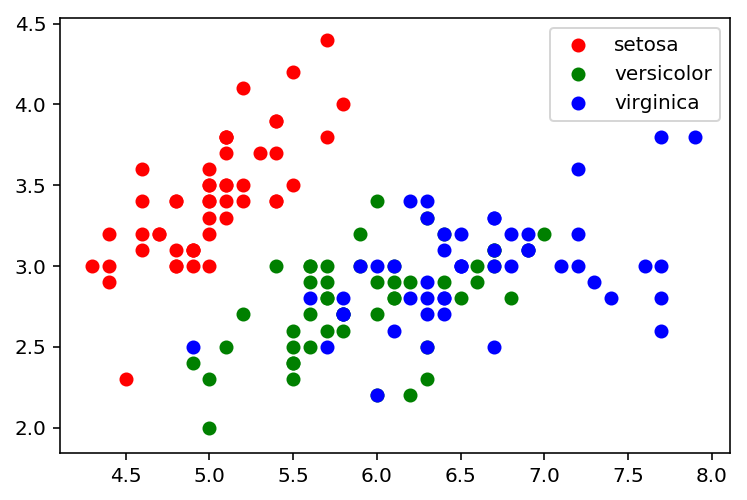

In [5]:
from sklearn import datasets

iris_names  = datasets.load_iris().target_names
iris_target = datasets.load_iris().target
iris_values = datasets.load_iris().data

scatter(iris_values[iris_target == 0, 0], iris_values[iris_target == 0, 1], c='r')
scatter(iris_values[iris_target == 1, 0], iris_values[iris_target == 1, 1], c='g')
scatter(iris_values[iris_target == 2, 0], iris_values[iris_target == 2, 1], c='b')
legend(iris_names)

In [6]:
pca      = PCA(n_components = None)
iris_pca = pca.fit_transform(iris_values)

for i in range(shape(iris_pca)[1]):
    explained_var = pca.explained_variance_ratio_[range(i + 1)].sum()
    print("Varianza explicada con", i + 1, "componentes:", explained_var)

Varianza explicada con 1 componentes: 0.924616207174
Varianza explicada con 2 componentes: 0.977631775025
Varianza explicada con 3 componentes: 0.99481691455
Varianza explicada con 4 componentes: 1.0


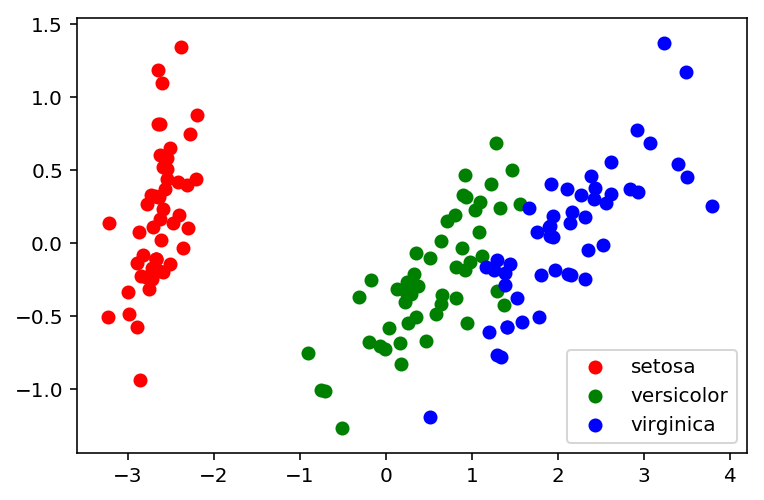

In [7]:
scatter(iris_pca[iris_target == 0, 0], iris_pca[iris_target == 0, 1], c='r')
scatter(iris_pca[iris_target == 1, 0], iris_pca[iris_target == 1, 1], c='g')
scatter(iris_pca[iris_target == 2, 0], iris_pca[iris_target == 2, 1], c='b')
legend(iris_names)

# Identificación de objetos similares con k-means
## Midiendo la similitud entre dos registros

In [8]:
from scipy.spatial.distance import cdist

print(cdist([[0, 1]], [[1, 2]], 'euclidean'))
print(cdist([[0, 1]], [[1, 2]], 'minkowski', p = 3))
print(cdist([[0, 1]], [[1, 2]], 'cityblock'))
print(cdist([[0, 1]], [[1, 2]], 'cosine'))
print(cdist([[0, 1]], [[1, 2]], 'correlation'))
print(cdist([[0, 1]], [[1, 2]], 'seuclidean', V =[0.25, 0.5]))

[[ 1.41421356]]
[[ 1.25992105]]
[[ 2.]]
[[ 0.10557281]]
[[  1.11022302e-16]]
[[ 2.44948974]]


## Algoritmo de k-means

In [9]:
from sklearn.datasets import make_blobs

blobs_3, classes_3 = make_blobs(300,
                                centers      = 3,
                                cluster_std  = 0.5,
                                random_state = 1)
blobs_5, classes_5 = make_blobs(300,
                                centers      = 5,
                                cluster_std  = 0.5,
                                random_state = 1)

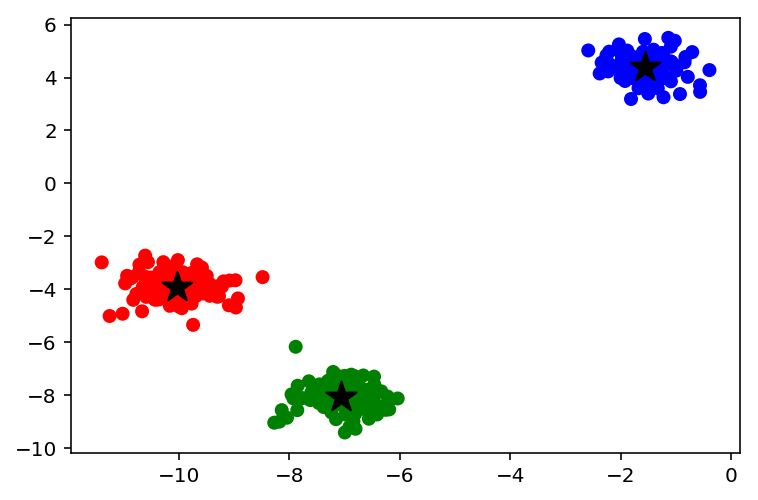

In [10]:
from sklearn.cluster import KMeans

color_map = array(['b','g','r','c','m','y','k'])

kmeans = KMeans(n_clusters = 3,
                random_state = 1).fit(blobs_3)
classes = kmeans.predict(blobs_3)

scatter(blobs_3[:, 0], blobs_3[:, 1],
        color = color_map[classes])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

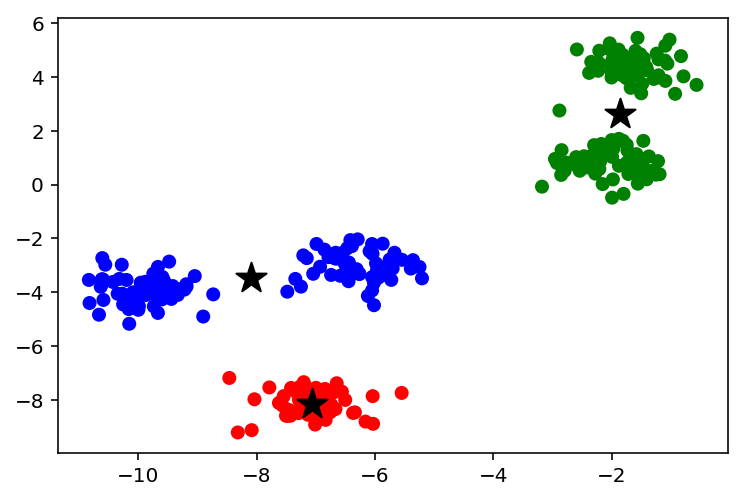

In [11]:
kmeans = KMeans(n_clusters = 3,
                random_state = 1).fit(blobs_5)
classes = kmeans.predict(blobs_5)

scatter(blobs_5[:, 0], blobs_5[:, 1],
        color = color_map[classes])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

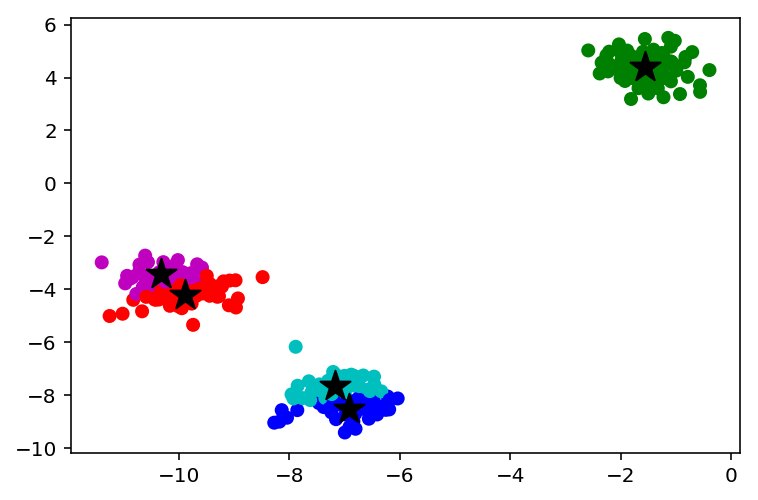

In [12]:
kmeans = KMeans(n_clusters = 5,
                random_state = 1).fit(blobs_3)
classes = kmeans.predict(blobs_3)

scatter(blobs_3[:, 0], blobs_3[:, 1],
        color = color_map[classes])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

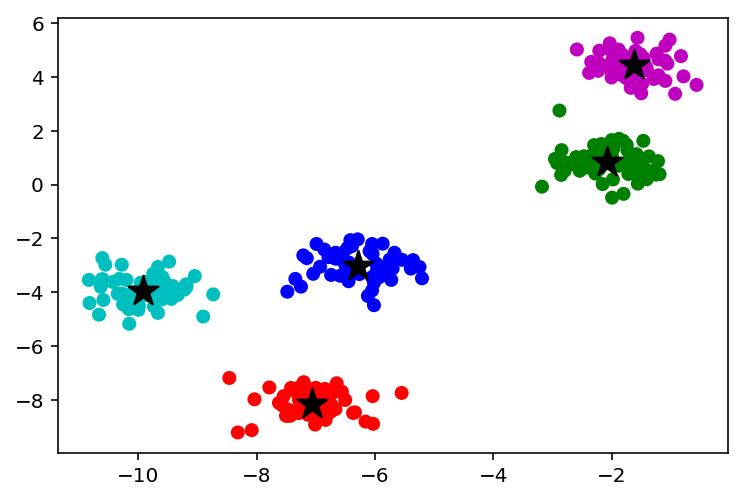

In [13]:
kmeans = KMeans(n_clusters = 5,
                random_state = 1).fit(blobs_5)
classes = kmeans.predict(blobs_5)

scatter(blobs_5[:, 0], blobs_5[:, 1],
        color = color_map[classes])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

## Identificación del número de clúster en un conjunto de dato

In [14]:
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plot(range(1, max_k), inertia, 'bx-')
    xlabel('k')
    ylabel(u'Dispersión')
    title(figure_name)

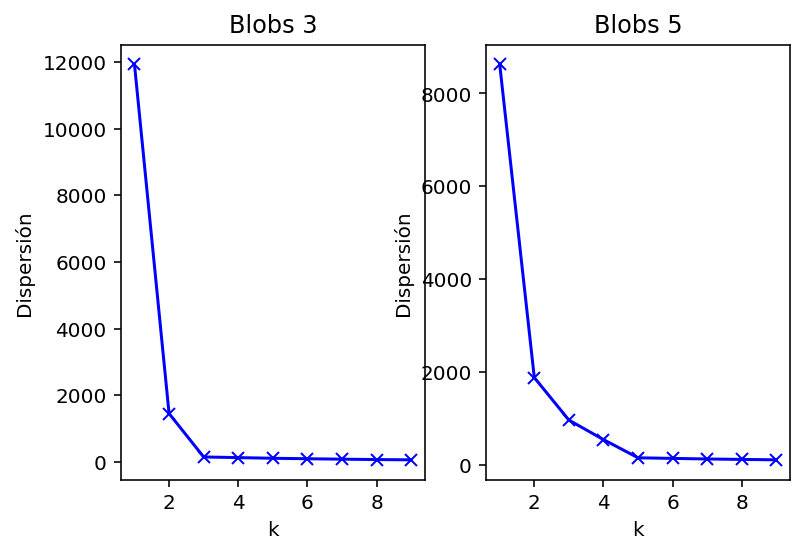

In [15]:
subplot(1, 2, 1)
plot_dispersion(blobs_3, 'Blobs 3')
subplot(1, 2, 2)
plot_dispersion(blobs_5, 'Blobs 5')

In [16]:
from sklearn.metrics import silhouette_score

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

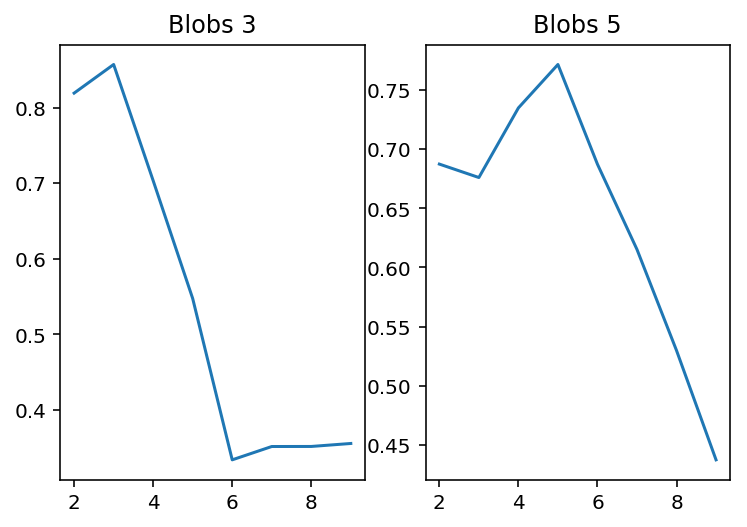

In [17]:
subplot(1, 2, 1)
plot_sillhouette(blobs_3, 'Blobs 3')
subplot(1, 2, 2)
plot_sillhouette(blobs_5, 'Blobs 5')

## Organización de clústeres como árbol jerárquico

In [18]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

df = pd.DataFrame(blobs_3[0:5, :])
row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')))
row_dist

,0,1,2,3,4
0,0.000000,6.092759,0.833313,11.845115,12.017689
1,6.092759,0.000000,6.816534,13.609028,13.798075
2,0.833313,6.816534,0.000000,11.391524,11.559173
3,11.845115,13.609028,11.391524,0.000000,0.189181
4,12.017689,13.798075,11.559173,0.189181,0.000000


In [19]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')

pd.DataFrame(row_clusters,
             columns = ['row 1', 'row 2', 'distance', 'items in cluster'],
             index = ['cluster %d' %(i) for i in range(row_clusters.shape[0])])

,row 1,row 2,distance,items in cluster
cluster 0,3.0,4.0,0.189181,2.0
cluster 1,0.0,2.0,0.833313,2.0
cluster 2,1.0,6.0,6.816534,3.0
cluster 3,5.0,7.0,13.798075,5.0


In [20]:
from scipy.cluster.hierarchy import dendrogram

# En el momento de preparación de este notebook existía un fallo en
# Jupyter Notebook que producía un fallo después de la ejecución de
# `dendrogram`. Se ha comentado la siguiene línea para que el
# Notebook se puede ejecutar sin fallos.Al descomentar la siguiente
# línea se puede ver la gráfica.

# dendrogram(row_clusters)

In [21]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
ac.fit_predict(df)

array([0, 0, 0, 1, 1])

In [22]:
ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
ac.fit_predict(df)

array([0, 0, 0, 1, 1])

## Localización de regiones a través de DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

km = KMeans(n_clusters = 3,
            random_state = 1).fit_predict(blobs_3)

ac = AgglomerativeClustering(n_clusters = 3, 
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(blobs_3)

db = DBSCAN(eps = 0.6,
            min_samples = 5,
            metric = 'euclidean').fit_predict(blobs_3)

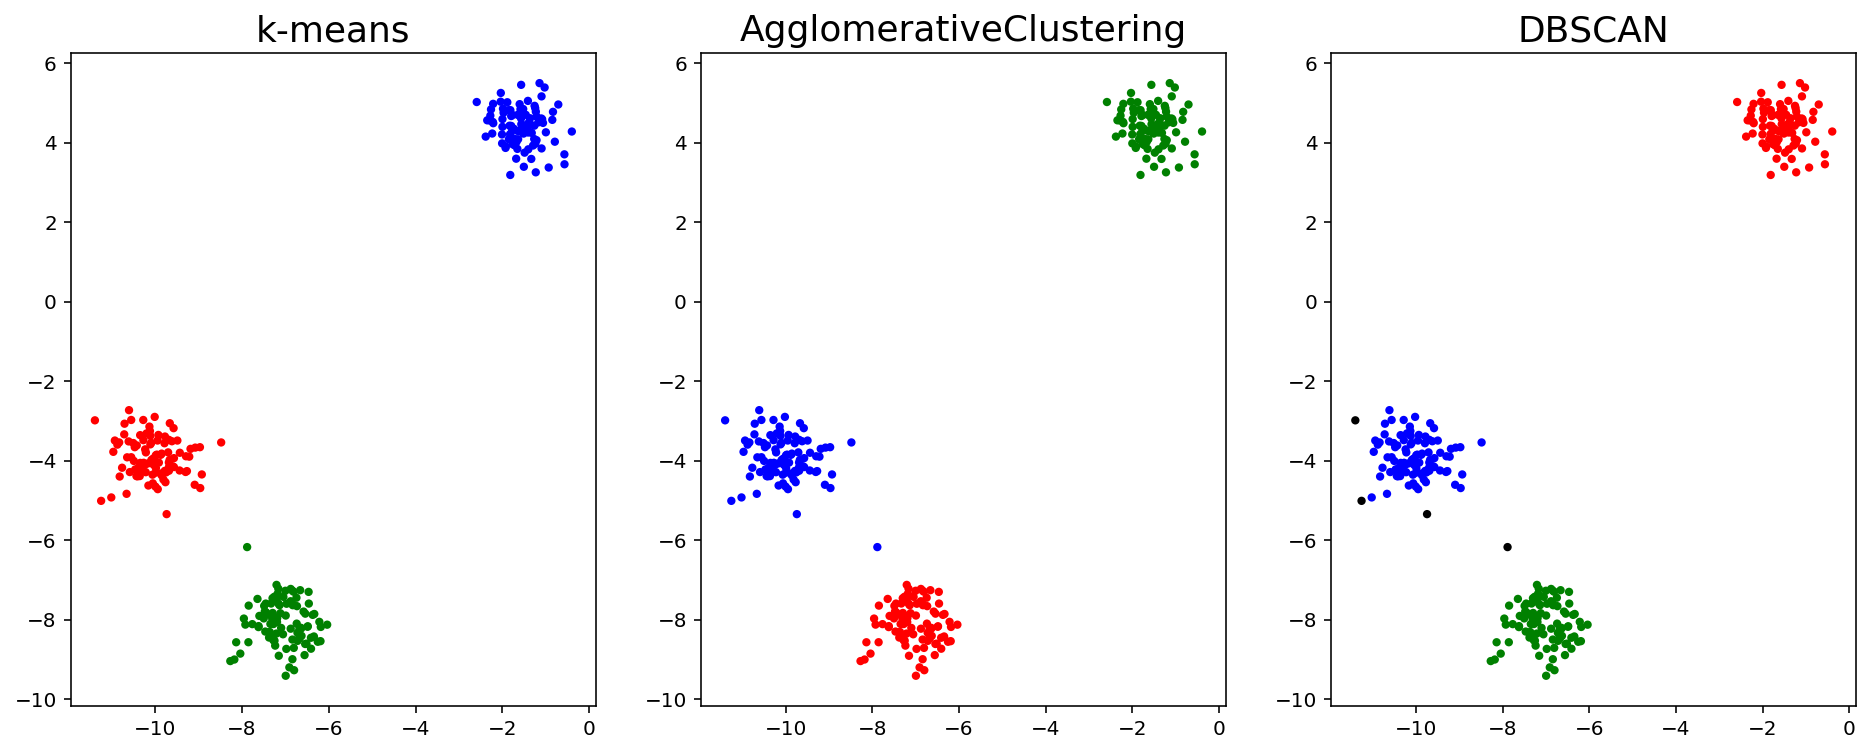

In [24]:
figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[km])
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[ac])
subplot(1, 3, 3)
plt.title('DBSCAN', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[db])

In [25]:
from sklearn.datasets import make_moons

moons, moons_classes = make_moons(n_samples = 200,
                                  noise = 0.05,
                                  random_state = 1)

km = KMeans(n_clusters = 2,
            random_state = 1).fit_predict(moons)

ac = AgglomerativeClustering(n_clusters = 2, 
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(moons)

db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean').fit_predict(moons)

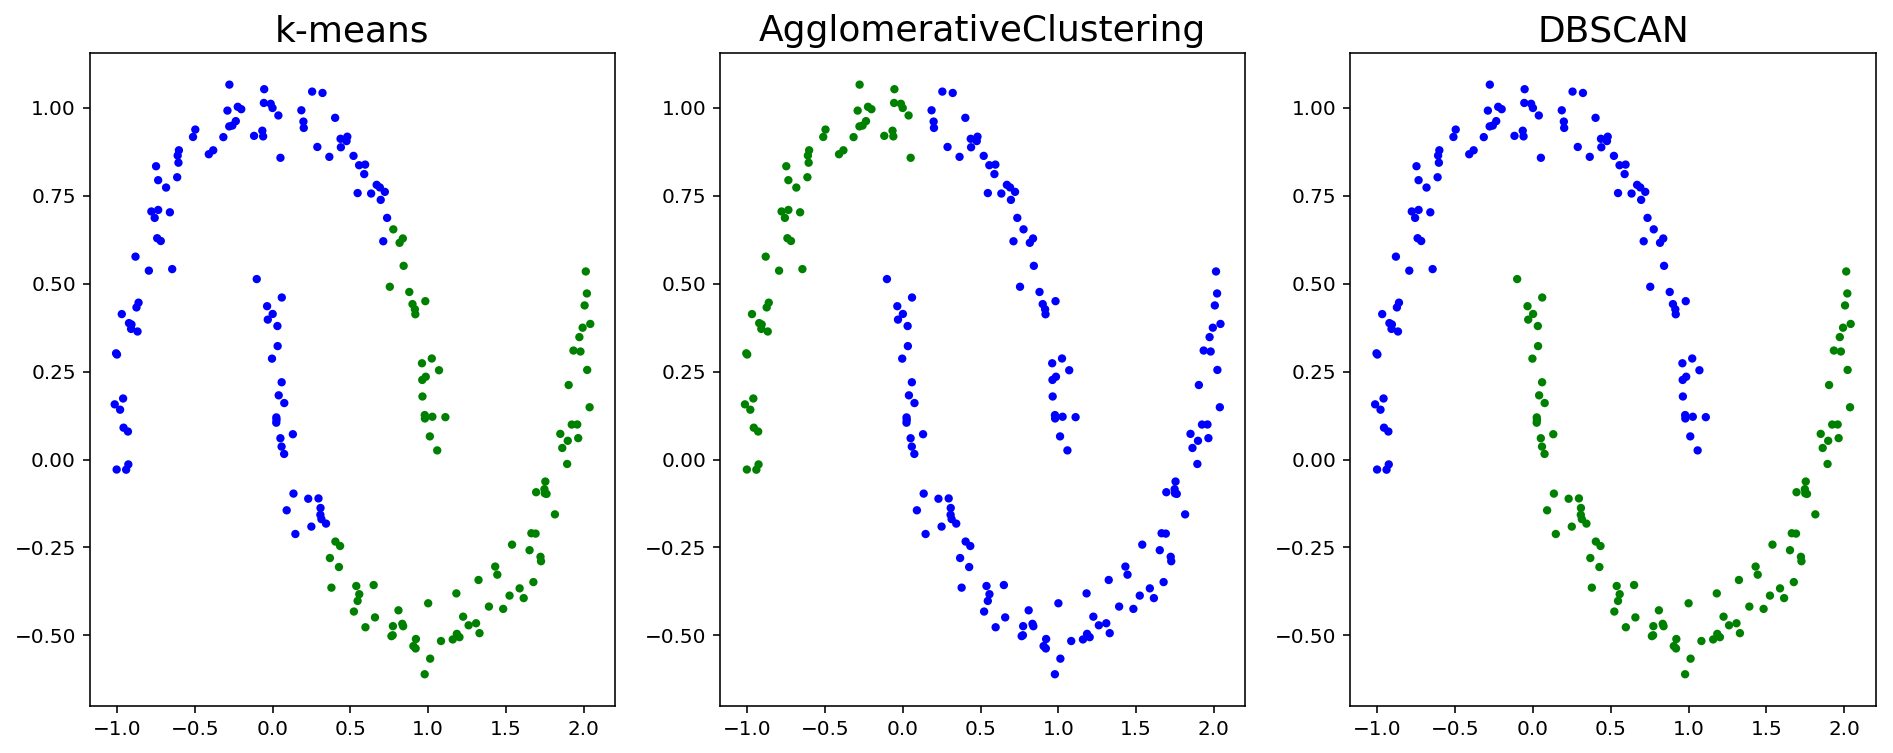

In [26]:
figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[km])
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[ac])
subplot(1, 3, 3)
plt.title('DBSCAN', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[db])

# Caso práctico
Utilización el algoritmo de k-means para identificar los outliers, o valores atípicos, de un conjunto de datos aleatorio.

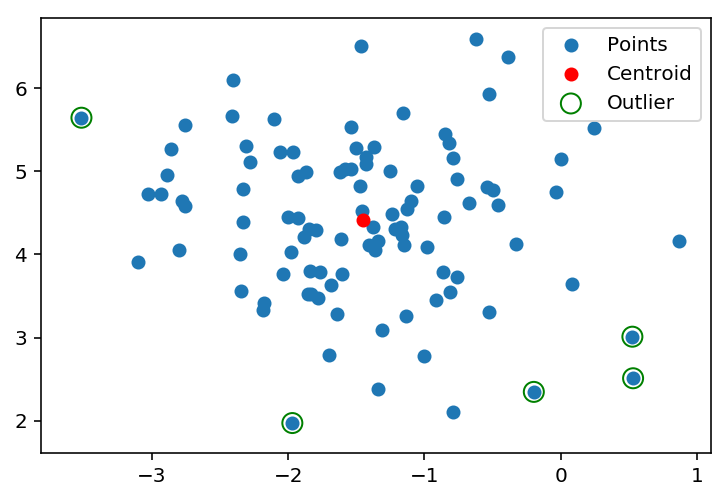

In [27]:
X, labels  = make_blobs(100, centers = 1, random_state = 1)

kmeans     = KMeans(n_clusters = 1, random_state = 1).fit(X)
distances  = kmeans.transform(X)
sorted_idx = argsort(distances.ravel())[::-1][:5]

scatter(X[:, 0], X[:, 1],
        label = 'Points')
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        label = 'Centroid',
        color = 'r')
scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
        label      = 'Outlier',
        edgecolors = 'g',
        facecolors = 'none',
        s          = 100)
legend(loc = 'best')

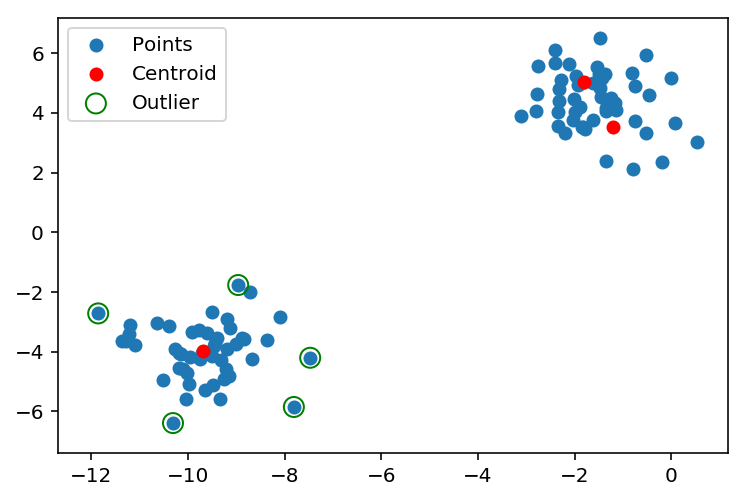

In [28]:
X, labels  = make_blobs(100, centers = 2, random_state = 1)

kmeans     = KMeans(n_clusters = 3, random_state = 1).fit(X)
distances  = kmeans.transform(X)
sorted_idx = argsort(np.min(distances, axis=1))[::-1][:5]

scatter(X[:, 0], X[:, 1],
        label = 'Points')
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        label = 'Centroid',
        color = 'r')
scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
        label      = 'Outlier',
        edgecolors = 'g',
        facecolors = 'none',
        s          = 100)
legend(loc = 'best')